# CSME2 Bonus Point Assignment II Parts 1 and 2
<div style="text-align: right;font-size: 0.8em">Document Version 2.0.0, released 2022-01-29</div>
For task instructions, refer to the assignment PDF.

* The parts of the code you are to implement are indicated via `# FILL HERE` comments.
* Some cells create export file in the `output/` folder. _Include whole `output/` folder in your submission_.
* Make sure you restart the notebook's kernel and run everything in one go before submission
* DO NOT CLEAR THE OUTPUT of the notebook you are submitting.

In [29]:
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm.auto import tqdm
from pathlib import Path

ROOT = Path('.')
DATA = ROOT / 'data'
EXAMPLE_IMAGE = DATA / 'example_image.png'
OUTPUT = ROOT / 'output'

OUTPUT.mkdir(exist_ok=True)

# Enable reproducibility
torch.manual_seed(0)
torch.set_deterministic(True)

In [30]:
##### FILL HERE #####
#### Question 3.2 ###
transform = transforms.Compose([
    transforms.ToTensor()])
train_ds = ImageFolder(DATA / 'train',transform=transform)
val_ds = ImageFolder(DATA / 'test',transform=transform)
#####################

In [31]:
class SimpLeNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ##### FILL HERE #####
        #### Question 3.3 ###
        #####################

        self.conv1 = torch.nn.Conv2d(3,16,3,stride=1,padding=1)
        self.pool =  torch.nn.MaxPool2d(2,stride=2)
        self.fc1 =  torch.nn.Linear(16*150*150,16)
        self.fc2 = torch.nn.Linear(16,1)

    def forward(self, x):
        ##### FILL HERE #####
        #### Question 3.3 ###
        #####################
        x = self.conv1(x)
        x = self.pool(x)
        x = torch.flatten(x,1)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


In [32]:


def train(net, batch_size, epochs, learning_rate, qname):
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    losses = []
    
    ##### FILL HERE #####
    #### Question 3.4 ###
    # Create dataloader from train_ds
    dataloader = DataLoader(train_ds,batch_size=batch_size,shuffle=True)
    dataloader_val = DataLoader(val_ds,batch_size=batch_size,shuffle=True)
    #####################
    
    with tqdm(range(epochs)) as pbar:
        for epoch in pbar:  # loop over the dataset multiple times
            running_loss = 0.0
            for i, (inputs, labels) in enumerate(dataloader):
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = net(inputs)
                loss = criterion(outputs, labels.unsqueeze(dim=1).float())
                loss.backward()
                optimizer.step()

                # training curve
                running_loss += loss.item() * inputs.shape[0]
            
            ##### FILL HERE #####
            #### Question 3.4 ###
            # Compute Validation loss
            val_loss = 0.
            for i, (inputs_val,labels_val) in enumerate(dataloader_val):
                outputs_val = net(inputs_val)
                loss_val = criterion(outputs_val, labels_val.unsqueeze(dim=1).float())
                val_loss += loss_val.item()*inputs_val.shape[0]

            #####################
            
            losses.append([running_loss, val_loss])
            pbar.set_description(f"Loss {losses[-1][0]:.02f}/{losses[-1][1]:.02f}")
    
    # Save outputs
    with open(str(OUTPUT / f'{qname}.pt'), "wb") as f:
        torch.save(net, f)
    losses = np.array(losses)
    plt.plot(np.arange(len(losses)), losses[:, 0], label="train")
    plt.plot(np.arange(len(losses)), losses[:, 1], label="validation")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.tight_layout()
    plt.savefig(str(OUTPUT / f'{qname}.png'))

  0%|          | 0/10 [00:00<?, ?it/s]

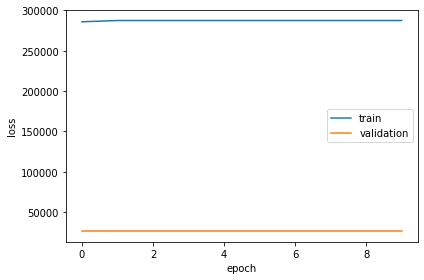

In [33]:
##### RUN HERE #####
#### Question 3.4 ###
net = SimpLeNet()
batch_size = 32
epochs = 10
learning_rate = 0.1
qname = 'question_3-4'
#net.summary()
train(net, batch_size, epochs, learning_rate, qname)
#####################

In [34]:
class ConvNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ##### FILL HERE #####
        #### Question 3.5 ###
        #####################

    def forward(self, x):
        ##### FILL HERE #####
        #### Question 3.5 ###
        #####################
        pass

  0%|          | 0/10 [00:00<?, ?it/s]

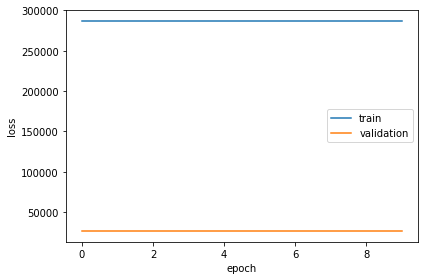

In [35]:
##### RUN HERE #####
#### Question 3.5 ###
convnet = ConvNet()
batch_size = 32
epochs = 10
learning_rate = 0.1
qname = 'question_3-5'
#convnet.summary()
train(net, batch_size, epochs, learning_rate, qname)
#####################